In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import requests
import zipfile

def download_file(url, save_path):
    response = requests.get(url, stream=True)
    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f"Downloaded file saved at {save_path}")

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Unzipped files to {extract_to}")
    os.remove(zip_path)
    print(f"Deleted zip file at {zip_path}")

def main():
    url = 'https://figshare.com/ndownloader/files/48018562'
    download_path = 'downloaded_file.zip'

    download_file(url, download_path)
    unzip_file(download_path, os.getcwd())

if __name__ == '__main__':
    main()

Downloaded file saved at downloaded_file.zip
Unzipped files to /content
Deleted zip file at downloaded_file.zip


In [3]:
!pip install gdown

import gdown

# Google Drive file ID (extracted from the link)
file_id = "1bTEGD6xFVfi7Hf4UGzrbj4BDSDchwhgG"
destination = "Eval_metrics_gen_excel.py"  # Change this to your desired filename

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1bTEGD6xFVfi7Hf4UGzrbj4BDSDchwhgG
From (redirected): https://drive.google.com/uc?id=1bTEGD6xFVfi7Hf4UGzrbj4BDSDchwhgG&confirm=t&uuid=1c69cef5-12ae-4160-af5d-2a8b9b3180f6
To: /content/Eval_metrics_gen_excel.py
100%|██████████| 3.56k/3.56k [00:00<00:00, 3.32MB/s]


'Eval_metrics_gen_excel.py'

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
# Define directories
train_dir = '/content/Dataset/training'
test_dir = '/content/Dataset/validation'

In [6]:
# Load and prepare data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 37607 images belonging to 10 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 16132 images belonging to 10 classes.


In [9]:
# Get class labels
class_labels = train_generator.class_indices.keys()

In [10]:
#Calculate class weights
class_weights = {}
for i, label in enumerate(class_labels):
    class_weights[i] = len(train_generator.classes) / len(np.where(train_generator.classes == i)[0])


In [11]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_labels), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 107s 85ms/step - accuracy: 0.3265 - loss: 19.3984 - val_accuracy: 0.3689 - val_loss: 1.7193
Epoch 2/5
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 116s 98ms/step - accuracy: 0.4929 - loss: 13.4556 - val_accuracy: 0.3905 - val_loss: 2.0046
Epoch 3/5
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 111s 72ms/step - accuracy: 0.5953 - loss: 10.1707 - val_accuracy: 0.6349 - val_loss: 1.1809
Epoch 4/5
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 84s 72ms/step - accuracy: 0.6808 - loss: 7.4737 - val_accuracy: 0.7036 - val_loss: 1.0280
Epoch 5/5
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 85s 72ms/step - accuracy: 0.7417 - loss: 5.4375 - val_accuracy: 0.7443 - val_loss: 1.0170


In [14]:
# Evaluate model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.3f}')

505/505 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.7459 - loss: 1.0004
Test accuracy: 0.744


In [15]:
# Make predictions
predictions = model.predict(test_generator)

505/505 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step


In [25]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [26]:
# Evaluate model performance
print('Classification Report:')
print(classification_report(test_generator.classes, predicted_labels))
print('Confusion Matrix:')
print(confusion_matrix(test_generator.classes, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.04      0.03       497
           1       0.02      0.03      0.02       359
           2       0.08      0.08      0.08      1155
           3       0.02      0.04      0.02       297
           4       0.02      0.02      0.02       340
           5       0.03      0.03      0.03       343
           6       0.76      0.67      0.71     12287
           7       0.03      0.05      0.04       500
           8       0.02      0.03      0.02       286
           9       0.00      0.00      0.00        68

    accuracy                           0.52     16132
   macro avg       0.10      0.10      0.10     16132
weighted avg       0.59      0.52      0.55     16132

Confusion Matrix:
[[  22   23   45   20    5   13  326   29   12    2]
 [  21   11   27   19   15    9  232   15   10    0]
 [  58   37   87   38   27   38  779   62   23    6]
 [  18    6   23   12    3    6  209   10

In [18]:
# Classification report
print('Classification Report:')
print(classification_report(test_generator.classes, predicted_labels, target_names=class_labels))

Classification Report:
                  precision    recall  f1-score   support

    Angioectasia       0.03      0.04      0.03       497
        Bleeding       0.02      0.03      0.02       359
         Erosion       0.08      0.08      0.08      1155
        Erythema       0.02      0.04      0.02       297
    Foreign Body       0.02      0.02      0.02       340
Lymphangiectasia       0.03      0.03      0.03       343
          Normal       0.76      0.67      0.71     12287
           Polyp       0.03      0.05      0.04       500
           Ulcer       0.02      0.03      0.02       286
           Worms       0.00      0.00      0.00        68

        accuracy                           0.52     16132
       macro avg       0.10      0.10      0.10     16132
    weighted avg       0.59      0.52      0.55     16132



In [19]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(test_generator.classes, predicted_labels))

Confusion Matrix:
[[  22   23   45   20    5   13  326   29   12    2]
 [  21   11   27   19   15    9  232   15   10    0]
 [  58   37   87   38   27   38  779   62   23    6]
 [  18    6   23   12    3    6  209   10    7    3]
 [  21   15   22   17    7    9  228   12    8    1]
 [  15   12   19   21   13   12  229   16    6    0]
 [ 605  418  843  583  276  368 8255  610  268   61]
 [  24   17   34   28   11   13  329   27   16    1]
 [  15   11   14   21    6    9  189   13    8    0]
 [   0    2    7    4    3    0   49    2    1    0]]


In [20]:
# Per-class photo predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i, label in enumerate(class_labels):
    class_pred = predicted_labels[test_generator.classes == i]
    class_true = test_generator.classes[test_generator.classes == i]
    print(f'Class {label}:')
    print(f'  Accuracy: {accuracy_score(class_true, class_pred):.3f}')
    print(f'  Precision: {precision_score(class_true, class_pred, average="macro", zero_division=0):.3f}')
    print(f'  Recall: {recall_score(class_true, class_pred, average="macro", zero_division=0):.3f}')
    print(f'  F1-score: {f1_score(class_true, class_pred, average="macro", zero_division=0):.3f}')
    print()

Class Angioectasia:
  Accuracy: 0.044
  Precision: 0.100
  Recall: 0.004
  F1-score: 0.008

Class Bleeding:
  Accuracy: 0.031
  Precision: 0.111
  Recall: 0.003
  F1-score: 0.007

Class Erosion:
  Accuracy: 0.075
  Precision: 0.100
  Recall: 0.008
  F1-score: 0.014

Class Erythema:
  Accuracy: 0.040
  Precision: 0.100
  Recall: 0.004
  F1-score: 0.008

Class Foreign Body:
  Accuracy: 0.021
  Precision: 0.100
  Recall: 0.002
  F1-score: 0.004

Class Lymphangiectasia:
  Accuracy: 0.035
  Precision: 0.111
  Recall: 0.004
  F1-score: 0.008

Class Normal:
  Accuracy: 0.672
  Precision: 0.100
  Recall: 0.067
  F1-score: 0.080

Class Polyp:
  Accuracy: 0.054
  Precision: 0.100
  Recall: 0.005
  F1-score: 0.010

Class Ulcer:
  Accuracy: 0.028
  Precision: 0.111
  Recall: 0.003
  F1-score: 0.006

Class Worms:
  Accuracy: 0.000
  Precision: 0.000
  Recall: 0.000
  F1-score: 0.000



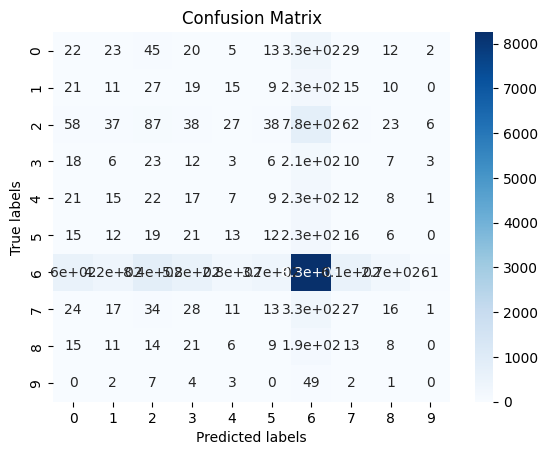

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_generator.classes, predicted_labels)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Show the plot
plt.show()

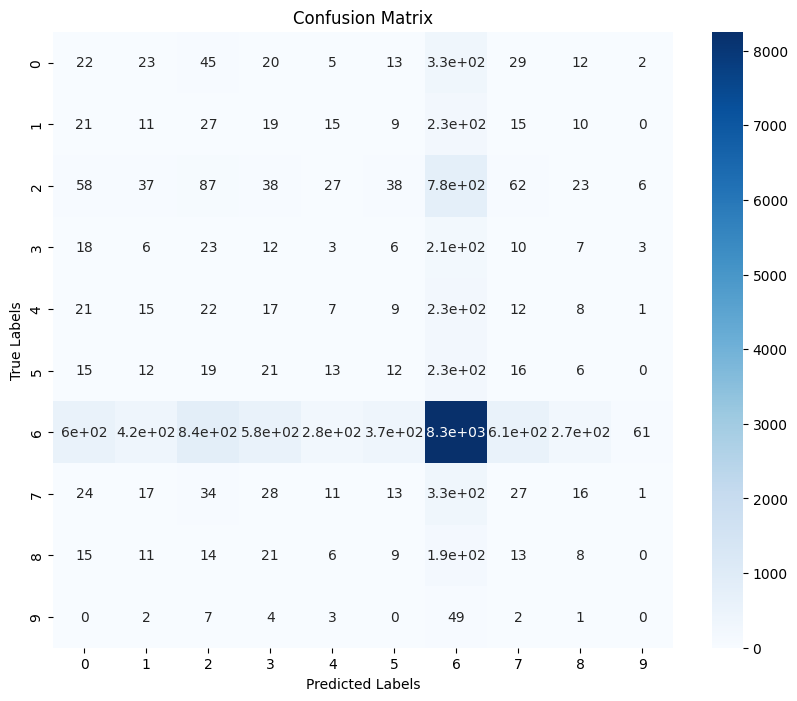

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_mat = confusion_matrix(test_generator.classes, predicted_labels)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

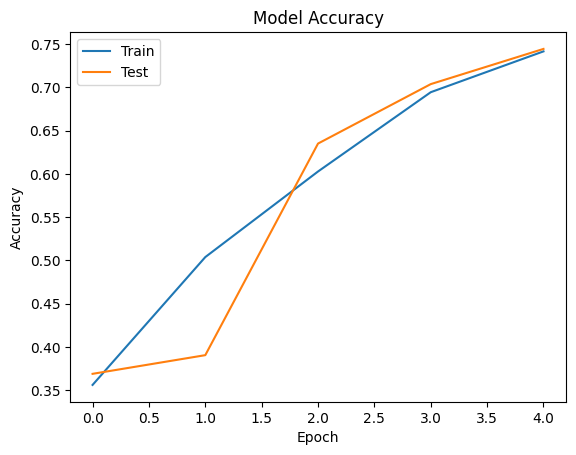

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

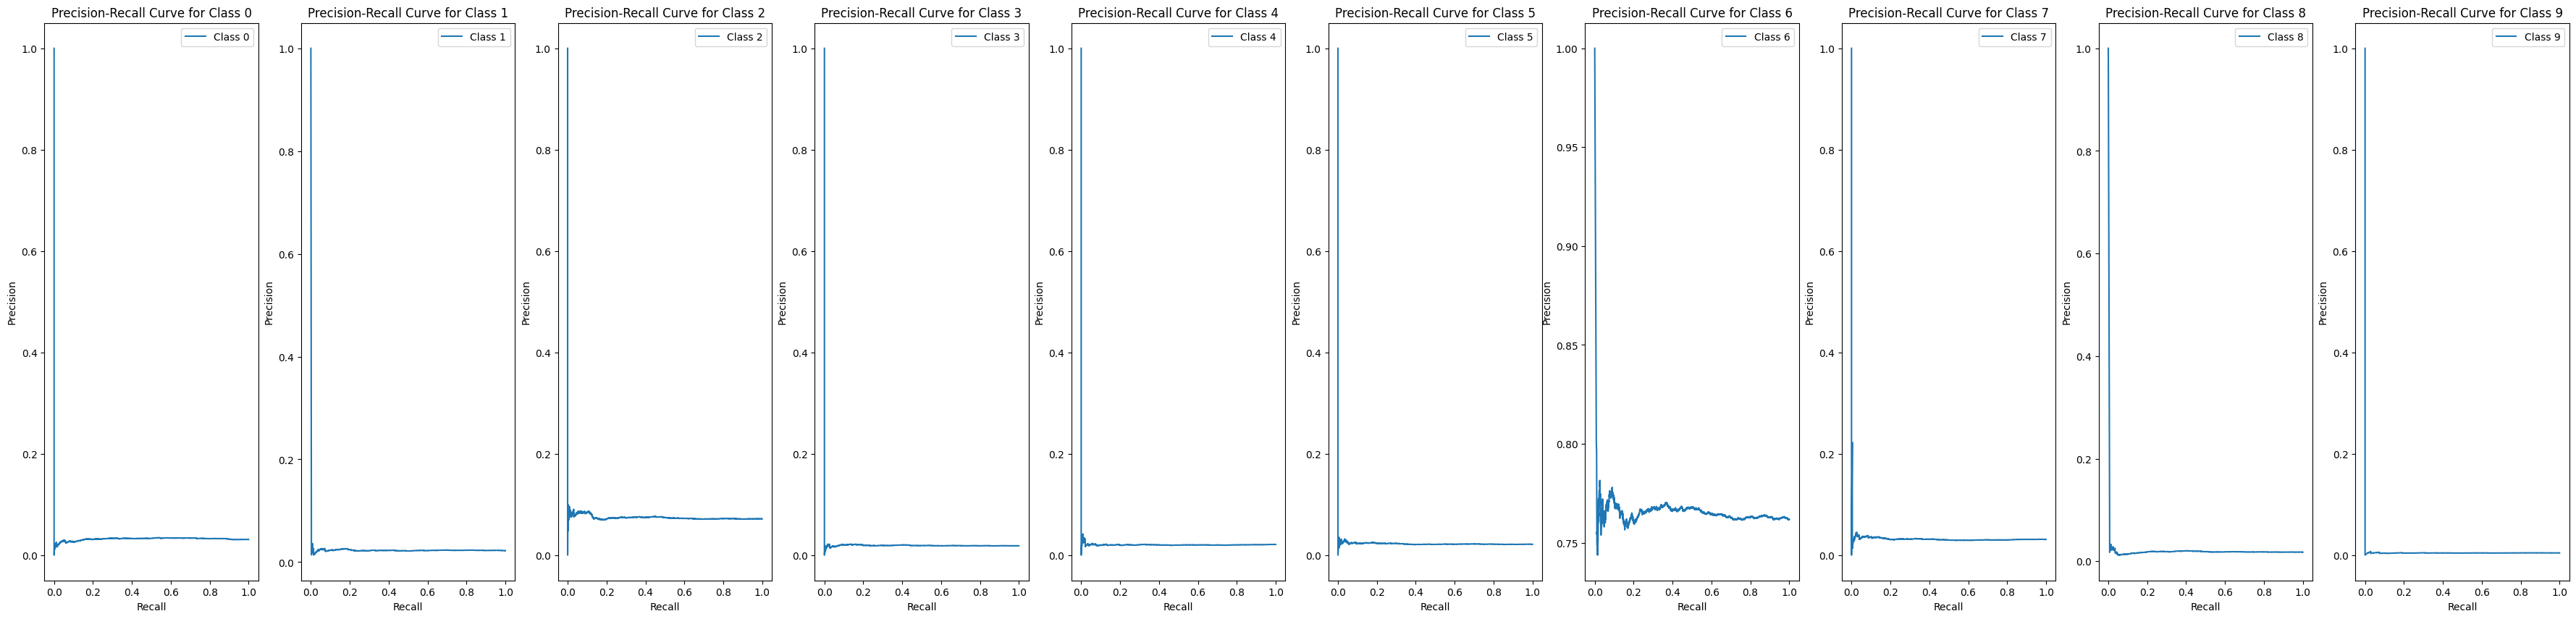

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get the true labels
true_labels = test_generator.classes

# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=len(np.unique(true_labels)), figsize=(45, 10))

# Loop over each class
for i in range(len(np.unique(true_labels))):
    # Get the precision and recall for this class
    precision, recall, _ = precision_recall_curve(true_labels == i, predictions[:, i])

    # Plot the precision-recall curve for this class
    ax[i].plot(recall, precision, label=f'Class {i}')
    ax[i].set_xlabel('Recall')
    ax[i].set_ylabel('Precision')
    ax[i].set_title(f'Precision-Recall Curve for Class {i}')
    ax[i].legend(loc='best')

# Show the plot
plt.show()

In [27]:
model.save('disease_model.h5')

In [28]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('disease_model.h5')

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_disease(model, img_path, class_labels):
    # Load the image and resize it to the target size (224x224)
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array and normalize it
    img_array = image.img_to_array(img) / 255.0

    # Expand dimensions to match the input shape of the model (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Map the predicted class index to the disease label
    predicted_disease = list(class_labels)[predicted_class_index]

    return predicted_disease

# Example usage
img_path = '/content/Dataset/validation/Worms/AIIMS/worm1_1077.jpg'  # Replace with the path to your test image
predicted_disease = predict_disease(model, img_path, class_labels)
print(f'Predicted Disease: {predicted_disease}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Disease: Worms
